In [24]:
import json
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [145]:
with open('GridSearch_results/als_history.json') as f:
    history = json.load(f)

In [16]:
history_recall_1 = []
history_recall_5 = []
history_recall_10 = []
history_recall_50 = []
history_ndcg_1 = []
history_ndcg_5 = []
history_ndcg_10 = []
history_ndcg_50 = []
for metric in history['score']:
    history_ndcg_1.append(metric['ndcg@1'])
    history_ndcg_10.append(metric['ndcg@10'])
    history_ndcg_5.append(metric['ndcg@5'])
    history_ndcg_50.append(metric['ndcg@50'])
    history_recall_1.append(metric['recall@1'])
    history_recall_10.append(metric['recall@10'])
    history_recall_5.append(metric['recall@5'])
    history_recall_50.append(metric['recall@50'])

In [147]:
recall_1 = pl.DataFrame({'l2': history['l2'], 'n_factors': history['n_factors'], 'score': history_recall_1})
recall_50 = pl.DataFrame({'l2': history['l2'], 'n_factors': history['n_factors'], 'score': history_recall_50})
recall_5 = pl.DataFrame({'l2': history['l2'], 'n_factors': history['n_factors'], 'score': history_recall_5})
recall_10 = pl.DataFrame({'l2': history['l2'], 'n_factors': history['n_factors'], 'score': history_recall_10})
ndcg_1 = pl.DataFrame({'l2': history['l2'], 'n_factors': history['n_factors'], 'score': history_ndcg_1})
ndcg_10 = pl.DataFrame({'l2': history['l2'], 'n_factors': history['n_factors'], 'score': history_ndcg_10})
ndcg_5 = pl.DataFrame({'l2': history['l2'], 'n_factors': history['n_factors'], 'score': history_ndcg_5})
ndcg_50 = pl.DataFrame({'l2': history['l2'], 'n_factors': history['n_factors'], 'score': history_ndcg_50})

In [199]:
def visualization_heatmap(data: pl.DataFrame, metric: 'str', ax=None):
    crosstab = pd.pivot_table(data.to_pandas(), index=['n_factors'], columns=['l2'], values='score')
    ax = sns.heatmap(crosstab, annot=True, cmap='Blues', ax=ax)
    ax.set_title(metric)
    ax.set_xlabel('$\lambda$')
    ax.set_ylabel('Кол-во факторов  f')
    return ax
    

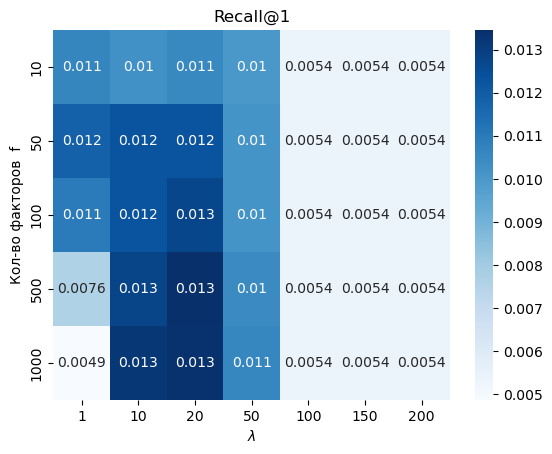

In [200]:
visualization_heatmap(recall_1, metric='Recall@1')
plt.show()

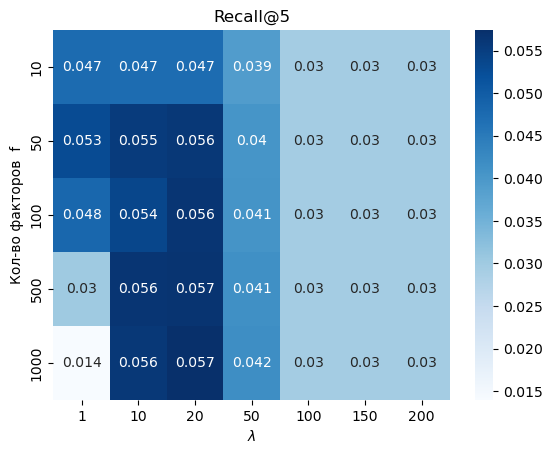

In [201]:
visualization_heatmap(recall_5, metric='Recall@5')
plt.show()

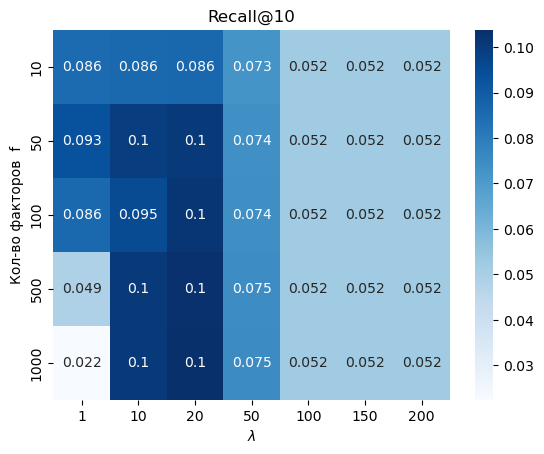

In [202]:
visualization_heatmap(recall_10, metric='Recall@10')
plt.show()

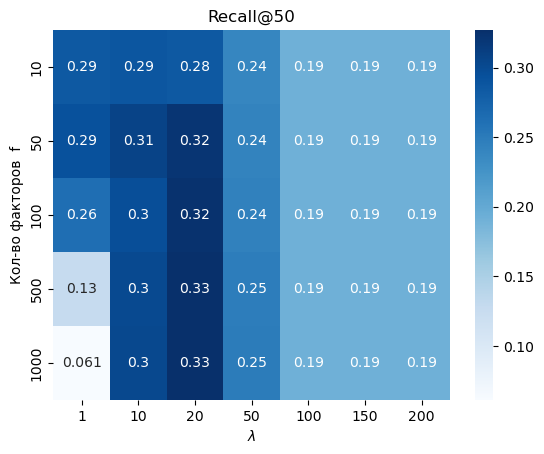

In [203]:
visualization_heatmap(recall_50, metric='Recall@50')
plt.show()

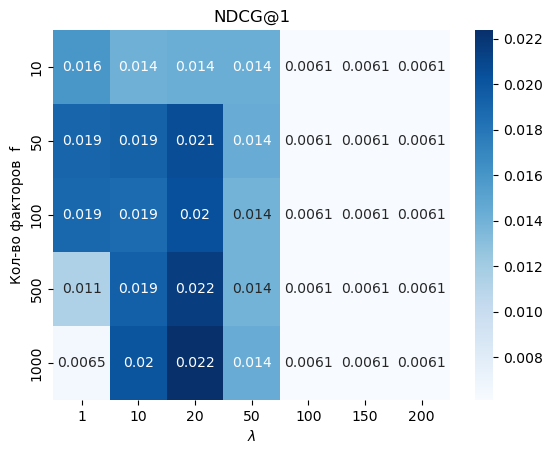

In [204]:
visualization_heatmap(ndcg_1, metric='NDCG@1')
plt.show()

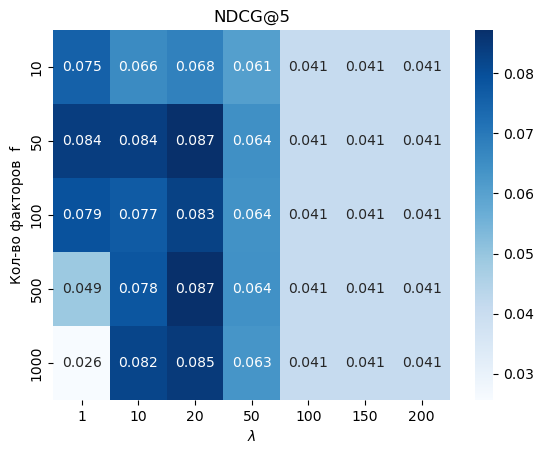

In [205]:
visualization_heatmap(ndcg_5, metric='NDCG@5')
plt.show()

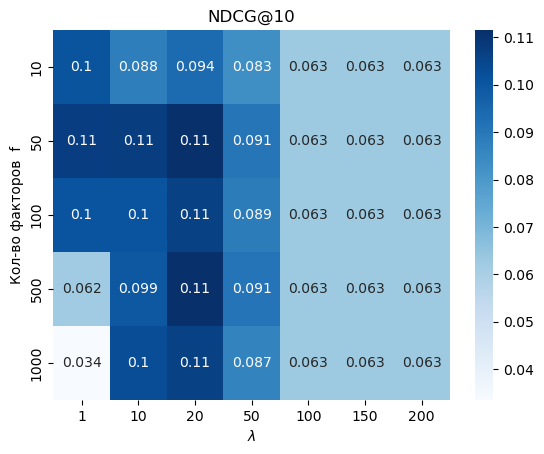

In [206]:
visualization_heatmap(ndcg_10, metric='NDCG@10')
plt.show()

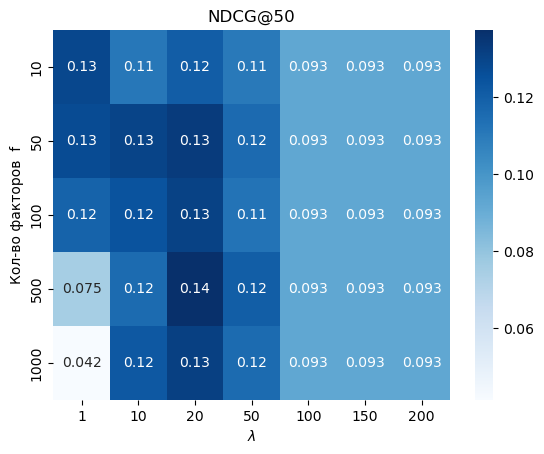

In [207]:
visualization_heatmap(ndcg_50, metric='NDCG@50')
plt.show()

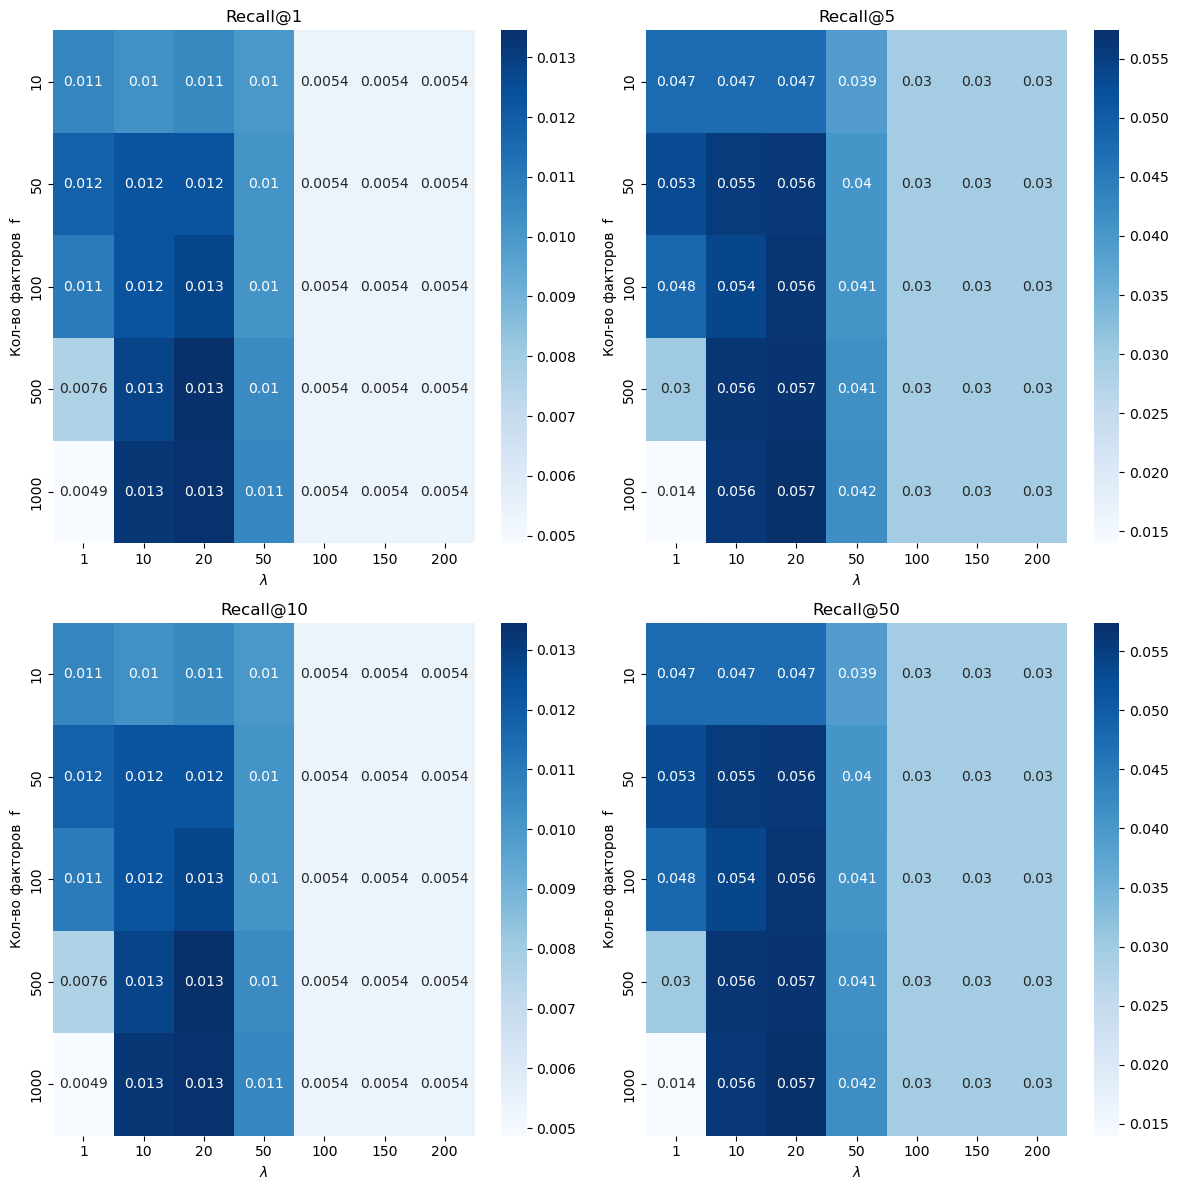

In [212]:
def visualization_heatmap_4(data: list, metrics: str):
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    for i, metric in enumerate(metrics[:2]):
        ax[0, i] = visualization_heatmap(data[i], metric, ax=ax[0, i])
    for i, metric in enumerate(metrics[2:]):
        ax[1, i] = visualization_heatmap(data[i], metric, ax=ax[1, i])
    plt.tight_layout()
    plt.show()
visualization_heatmap_4(data=[recall_1, recall_5, recall_10, recall_50], 
                        metrics=['Recall@1', 'Recall@5', 'Recall@10', 'Recall@50'])

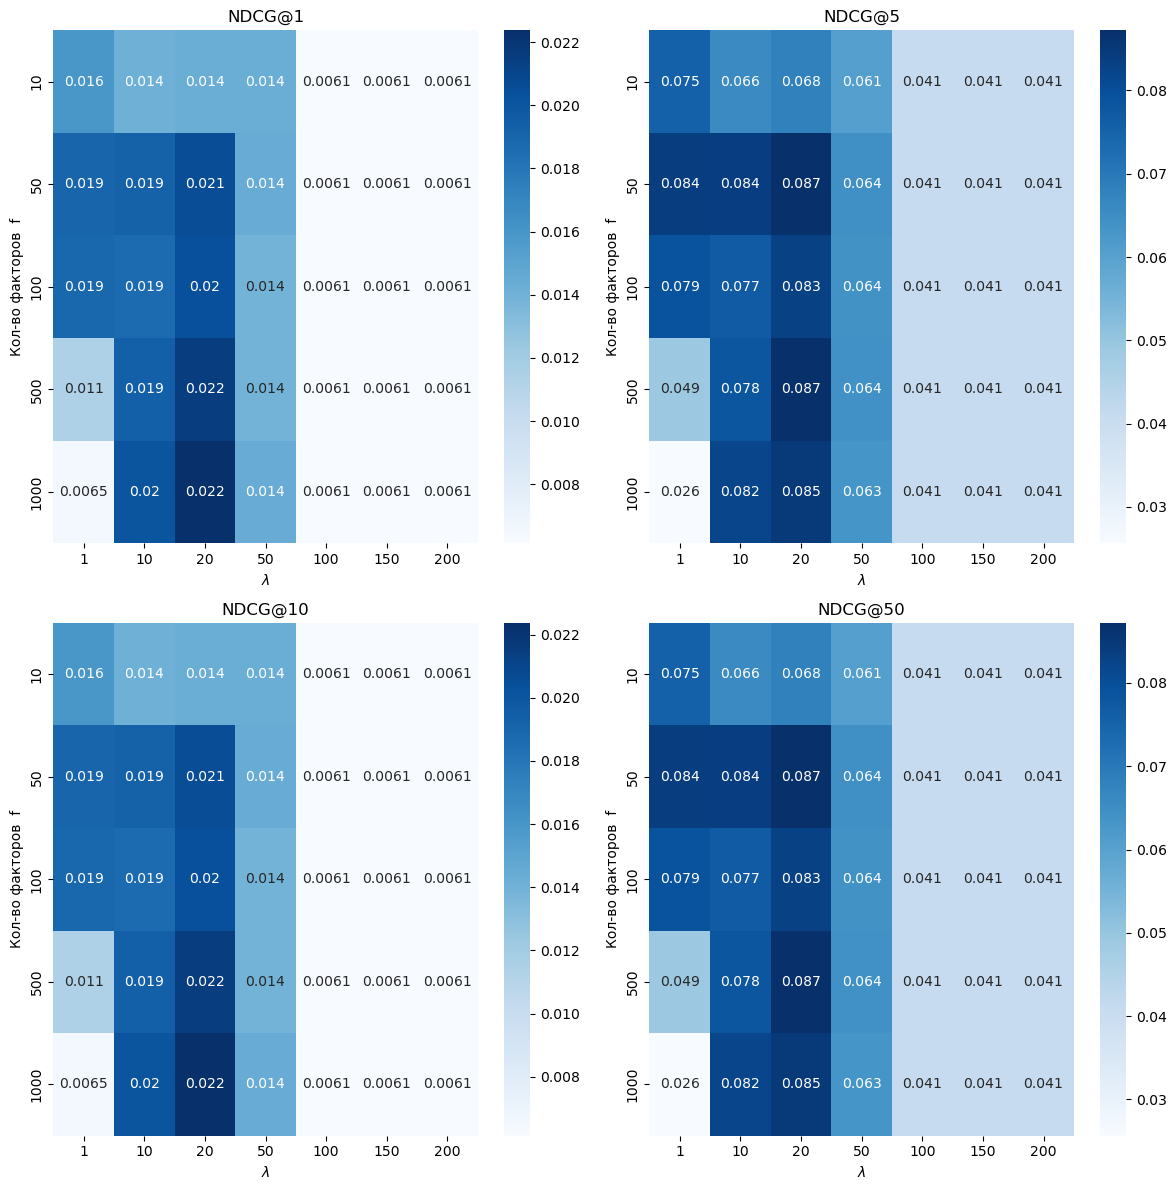

In [213]:
visualization_heatmap_4(data=[ndcg_1, ndcg_5, ndcg_10, ndcg_50], 
                        metrics=['NDCG@1', 'NDCG@5', 'NDCG@10', 'NDCG@50'])